# End to End ML Project

### Steps for ML Project 
1. Import libraries
2. Data Cleaning
3. EDA
4. Data Preprocessing
5. Model Fitting
6. Model Evaluation 
7. Model Optimization
8. Model Interpretation
9. Model Deployment

In [1]:
!pip install imbalanced-learn

In [2]:
!pip install shap

In [3]:
!pip install --pre pycaret

In [4]:
!pip install streamlit

  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=f1385b57b96717bafe46a4961f6ec930353f9734604b8c809b75d2c66da0d0a9
  Stored in directory: c:\users\akash inc\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [5]:
!pip install imbalanced-learn

In [3]:
!pip install xgboost

### Import Libraries

In [45]:
# for data manipulation 
import pandas as pd
import numpy as np

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(12,7))
plt.style.use("fivethirtyeight")
# for Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

# for Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# for Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report 

# for model optimization and interpretation
from sklearn.model_selection import train_test_split
import shap

# for warnings
import warnings
warnings.filterwarnings("ignore")
print("All libraries are imported")

All libraries are imported


<Figure size 864x504 with 0 Axes>

In [46]:
# get the data 
data=pd.read_csv("data.csv")

In [47]:
# view the data 
data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [9]:
#check for null
data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# check for zero errors 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [11]:
# check for duplicates 
data.duplicated().sum()

0

**Observations**
1. The data has 768 rows and 10 columns 
2. Column Unnamed: 0 is a reducndnat column and will be dropped
3. Columns Pregnancies, Glucose, BloodPressure, SkinThickness , Insulin and BMI have 0 errors and has to be impyuted with column medians 
4. There are no missing values
5. Only outcome is categorical and it has to encoded before modelling
6. There are no duplicates



In [12]:
# drop the Unnamed column 
data.drop("Unnamed: 0", axis=1, inplace=True)

In [13]:
# impute zero errors
zerofiller=lambda x: x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, axis=0)

In [14]:
# check descriptives again
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


Data looks good for EDA 

### Exploratory Data Analysis(EDA)
- Univariate Analysis
         -- numerical - histplots and boxplots 
         -- categorical
- Bivariate Analysis 
         -- categorical vs numerical
         -- numerical vs numerical 
- Multivariate 
         -- pairplots 
- Correlations 
         -- heatmaps

In [15]:
# Lets do Univariate Histograms 
def histograms(data):
    data.hist()
    plt.tight_layout()
    plt.show()

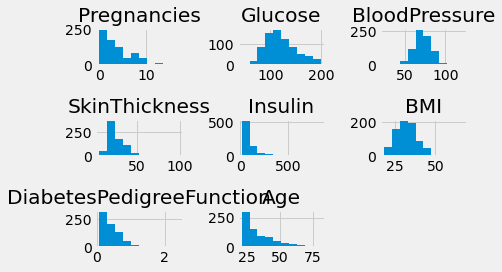

In [16]:
histograms(data)

In [17]:
# Lets do side by side histplot adn boxplots 
def histplot_boxplot(data, feature, figsize=(12,7), bins=None):
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios":(0.25, 0.75)},
    figsize=figsize )
    
    sns.boxplot(data=data, x=feature, showmeans=True, color="violet", ax=ax_box)
    sns.histplot(data=data, x=feature,pallete="winter", bins=bins, ax=ax_hist) if bins else sns.histplot(data=data,
                                                                     x=feature, ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), linestyle="--", color="green")
    ax_hist.axvline(data[feature].median(), linestyle="-", color="black")
    plt.show()

Pregnancies


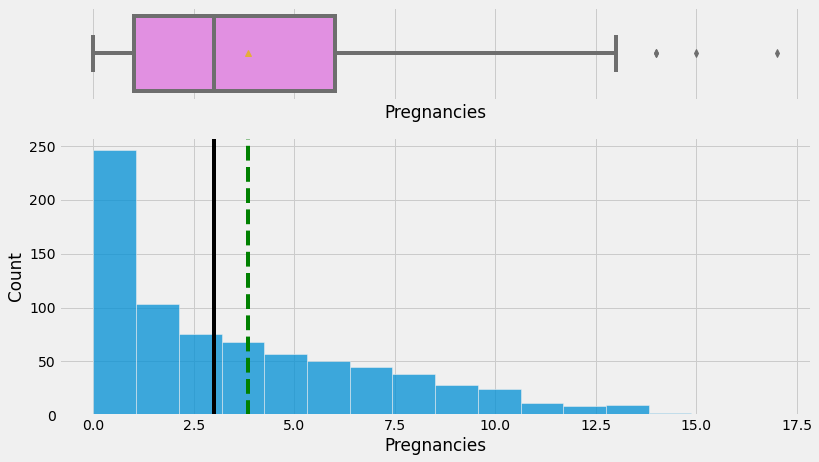

Glucose


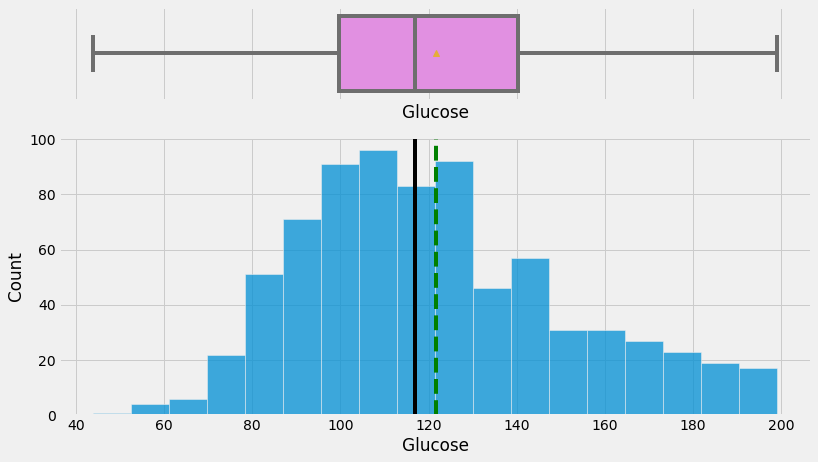

BloodPressure


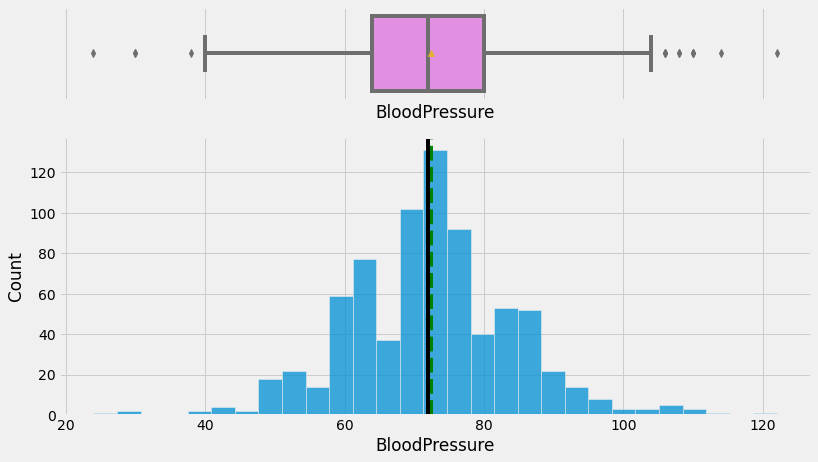

SkinThickness


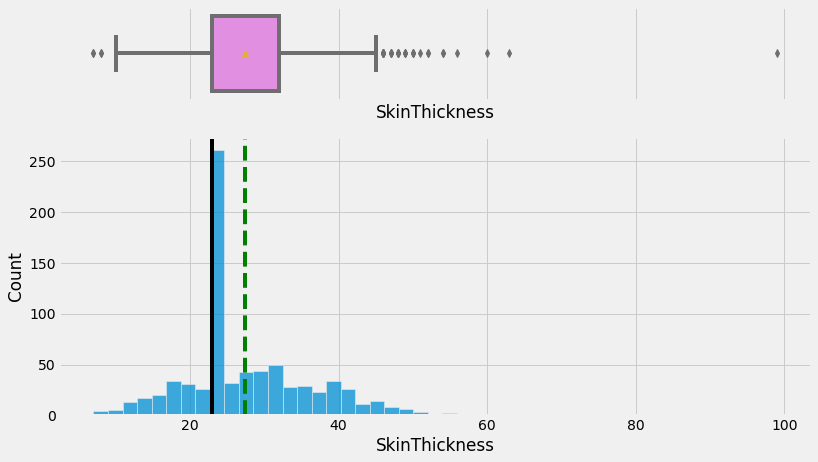

Insulin


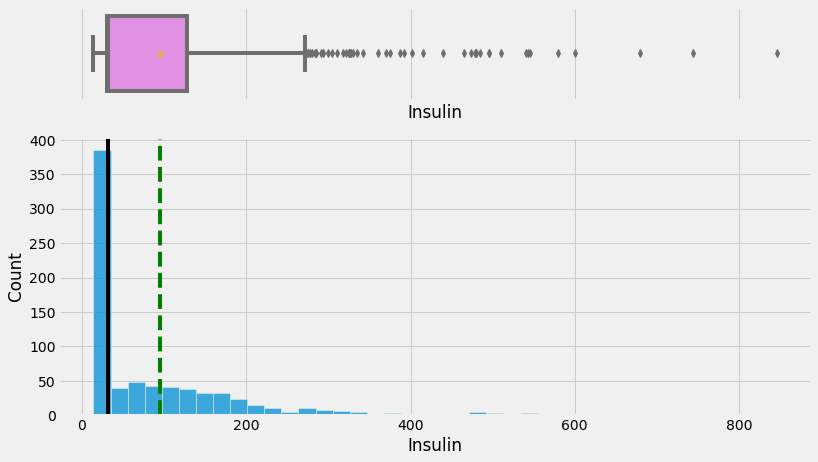

BMI


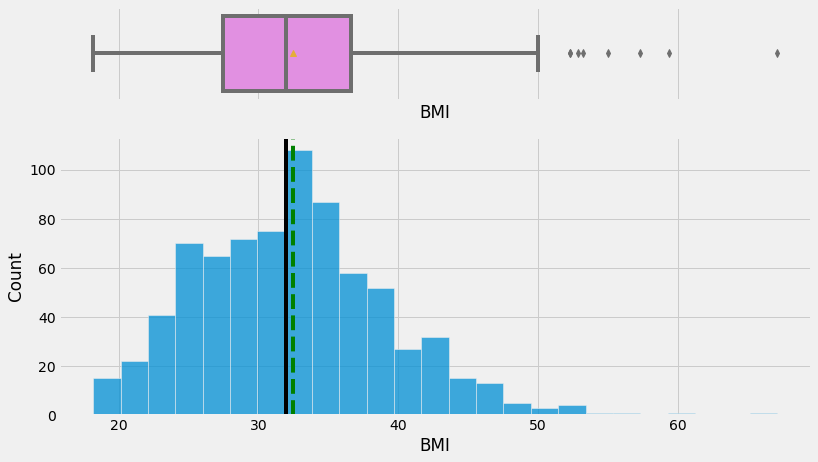

DiabetesPedigreeFunction


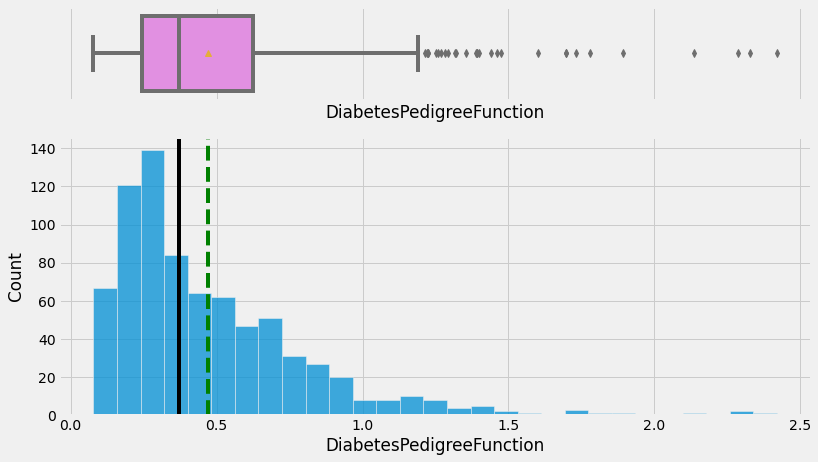

Age


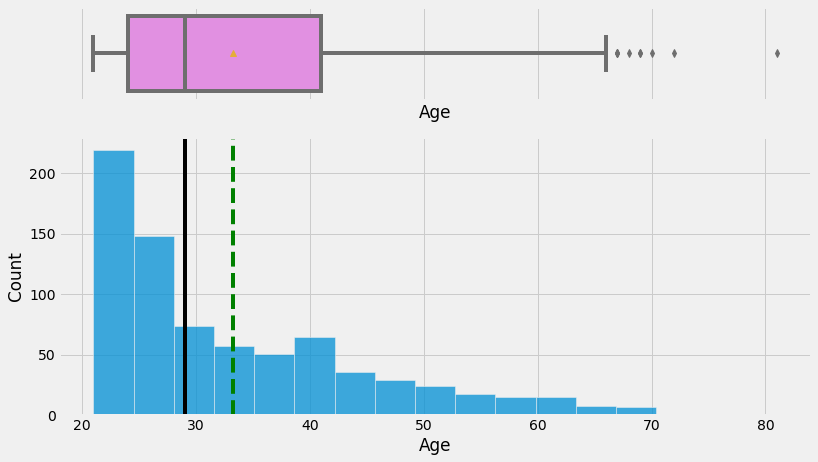

In [18]:
for col in data.select_dtypes(exclude="O").columns:
    print(col)
    histplot_boxplot(data=data, feature=col)
    plt.show()
    
    

Observations
1. Outliers- Preganancies, SkinThickness, Insulin , Diabetes Pedigree Function have lots of outliers we may need to cap the outer limit 
2. Skew- SkinThickness, Insulin , Diabetes Pedigree Function are highly right skewed and needs to be transformed using log or square root

In [19]:
# univariate Countplot
def countplot(data, feature):
    plt.figure(figsize=(12,7))
    ax=sns.countplot(data=data, x=feature, color="green")
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.3g}%".format(100.*y/len(data)), (x.mean(), y), ha="center", va="bottom")
    plt.show()

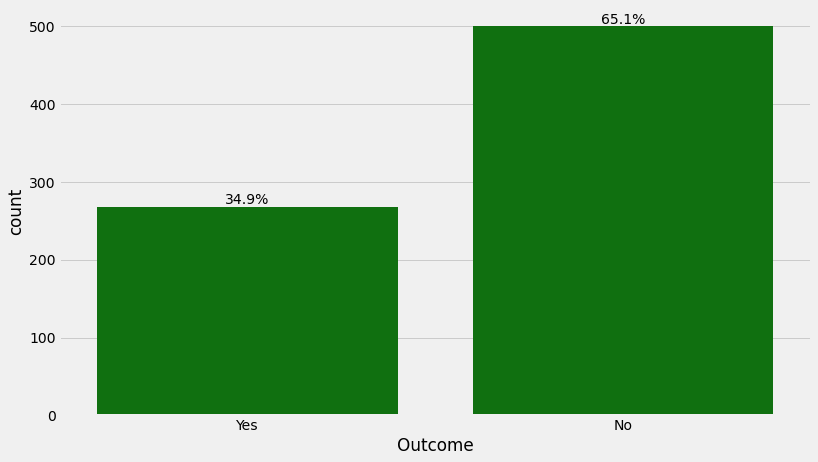

In [20]:
countplot(data=data,feature="Outcome")

The Outcome variable is not balanced. We would need for solve for data imbaalnce before modelling

In [21]:
# Bivariate -categorical vs numerical
def bivariate_barplot(data, feature1, feature2):
    data.groupby(feature1)[feature2].mean().plot(kind="bar", color="orange")
    plt.ylabel(col)
    plt.show()

Outcome vs  Pregnancies


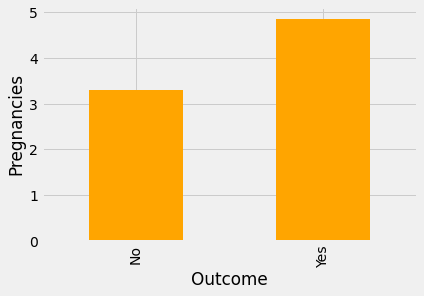

**************************************
Outcome vs  Glucose


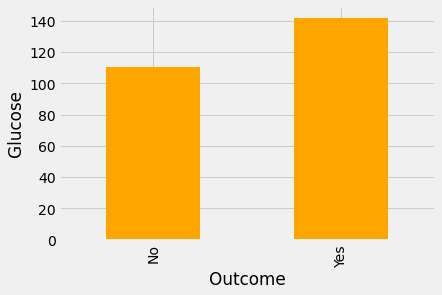

**************************************
Outcome vs  BloodPressure


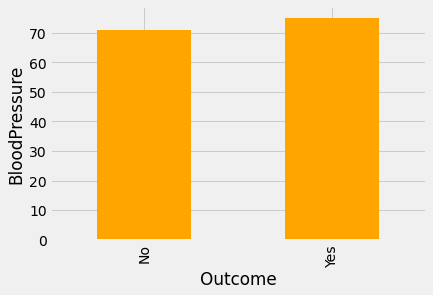

**************************************
Outcome vs  SkinThickness


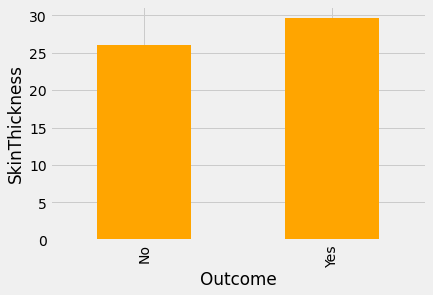

**************************************
Outcome vs  Insulin


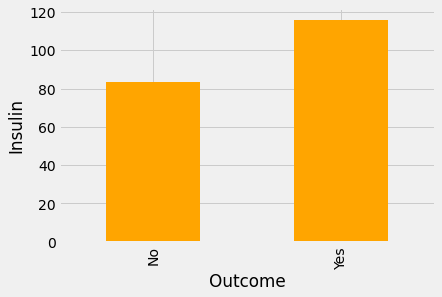

**************************************
Outcome vs  BMI


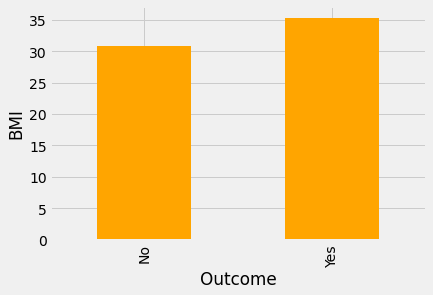

**************************************
Outcome vs  DiabetesPedigreeFunction


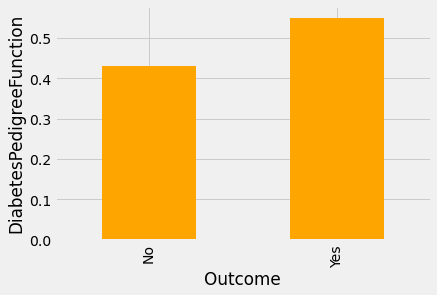

**************************************
Outcome vs  Age


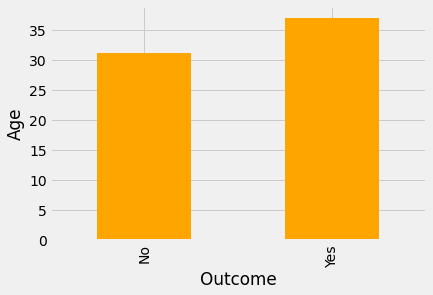

**************************************


In [22]:
for col in data.select_dtypes(exclude="O").columns:
    print("Outcome vs ", col)
    bivariate_barplot(data=data, feature1="Outcome",feature2= col)
    print("**************************************")

Those with higher Pregnancies, Glucose, Insulin, BMI and Age are more likely to be diabetic

In [23]:
# numericall vs numerical
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color="green")
    plt.title("Lineplotbetween {0} and {1}".format(feature1, feature2))
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color="orange", hue="Outcome")
    plt.title("Scatter Plot Between {0} and {1}".format(feature1, feature2))
    plt.show()

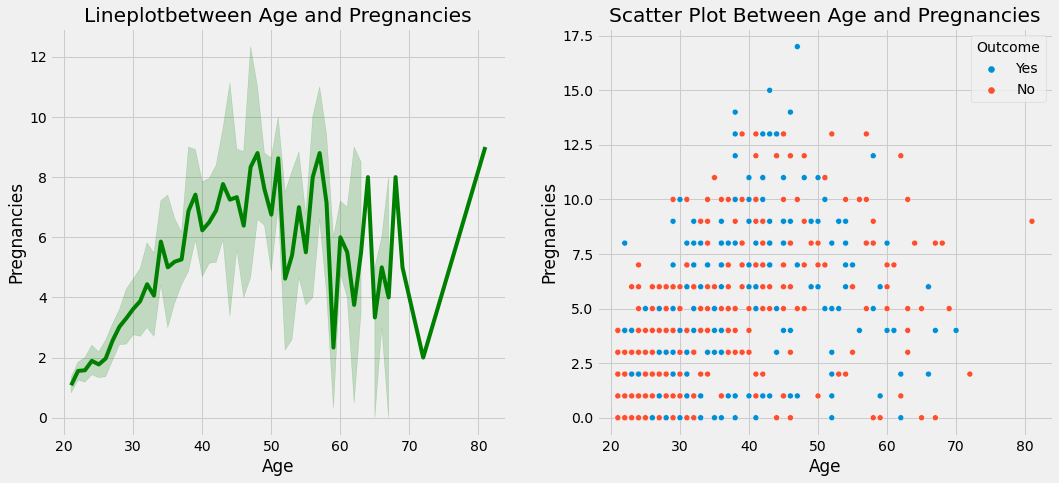

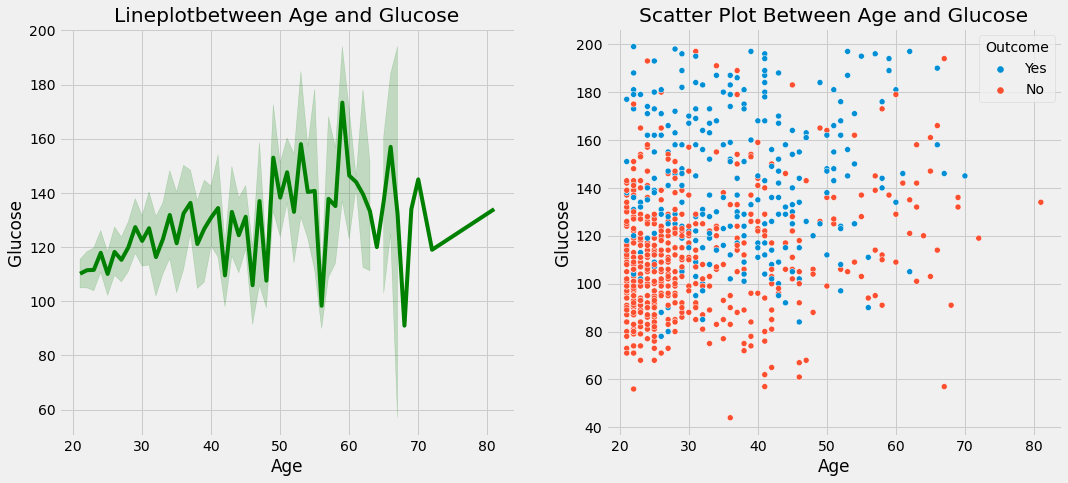

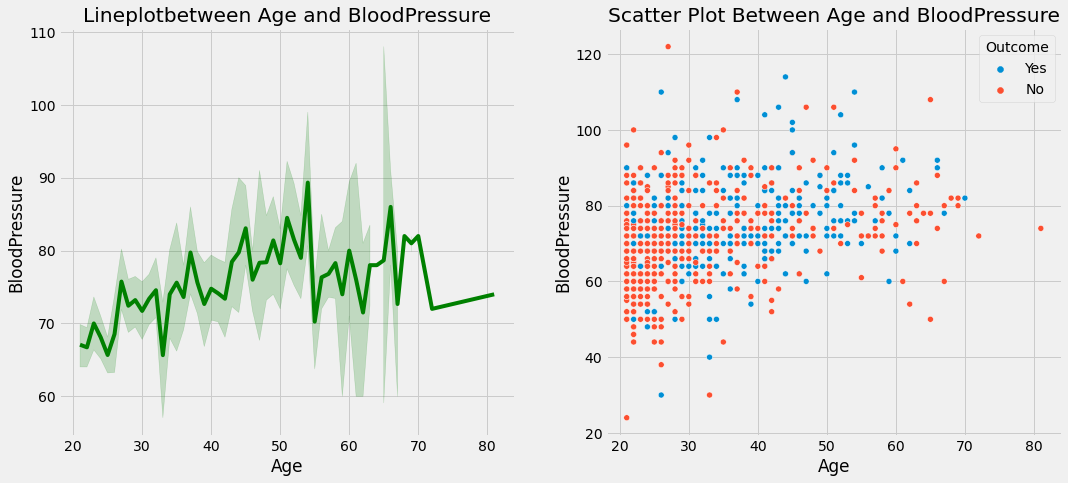

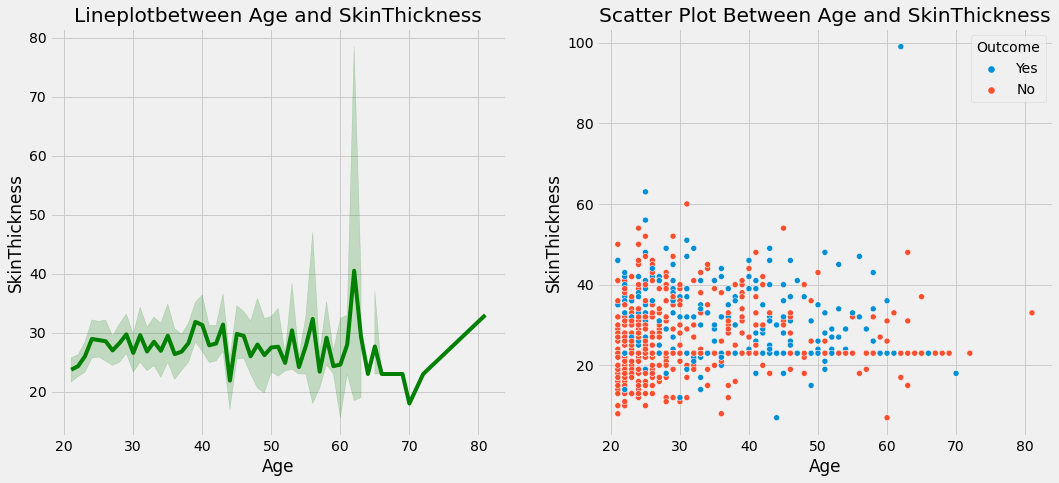

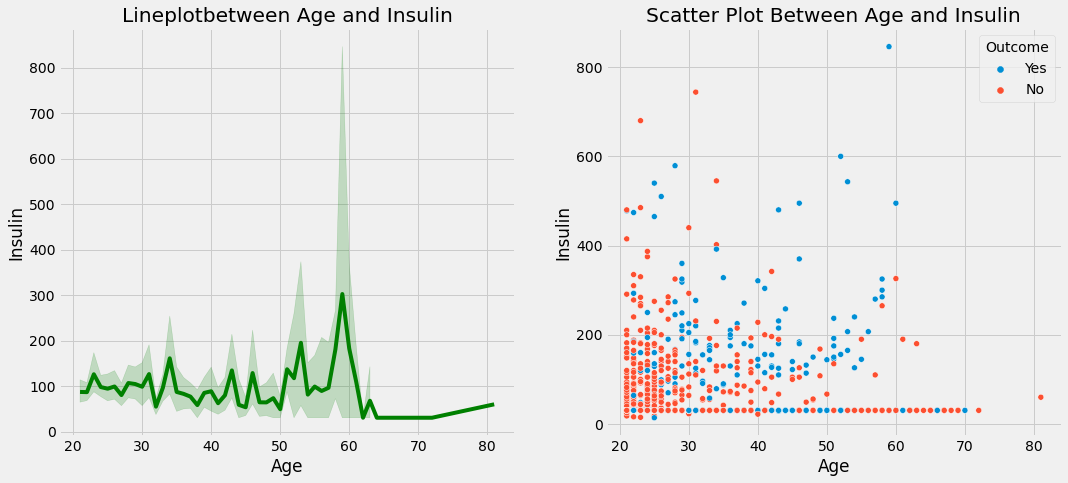

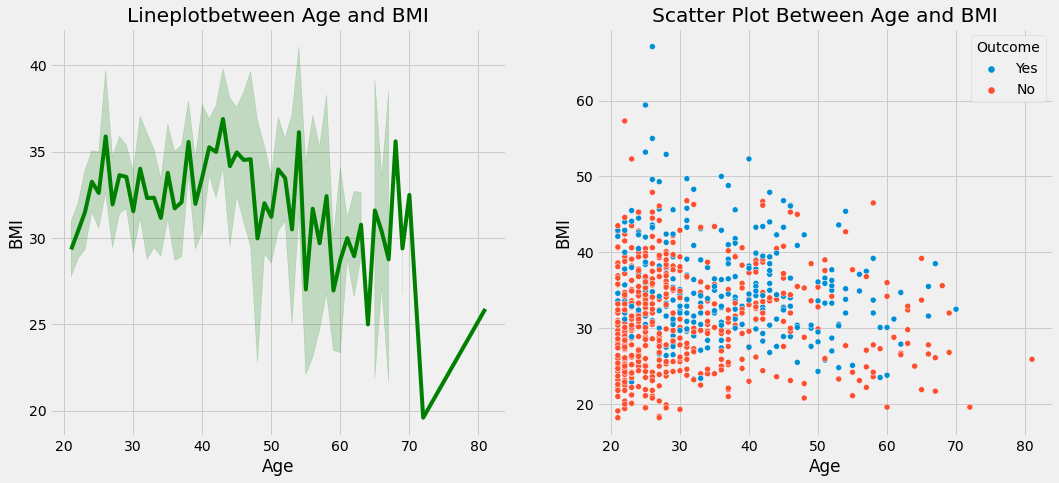

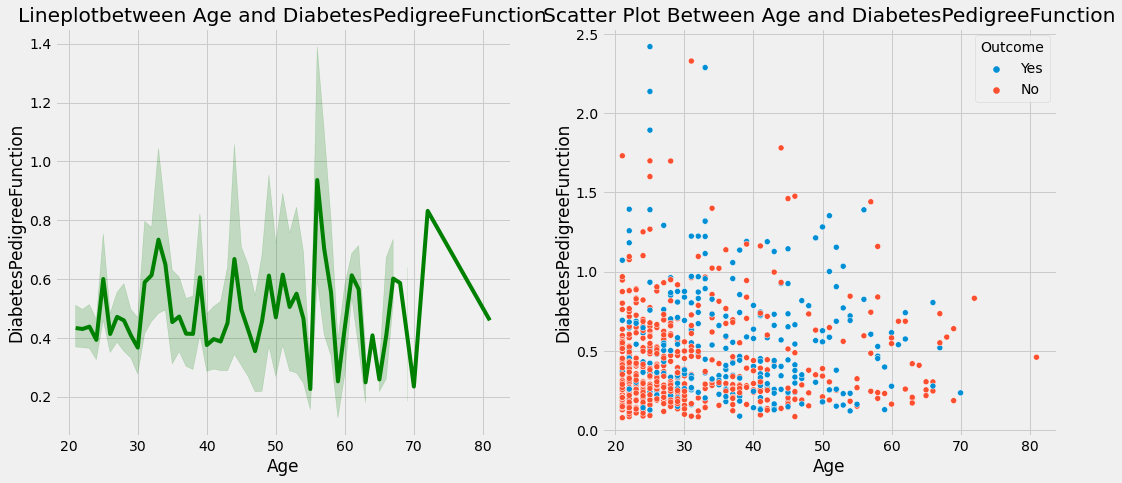

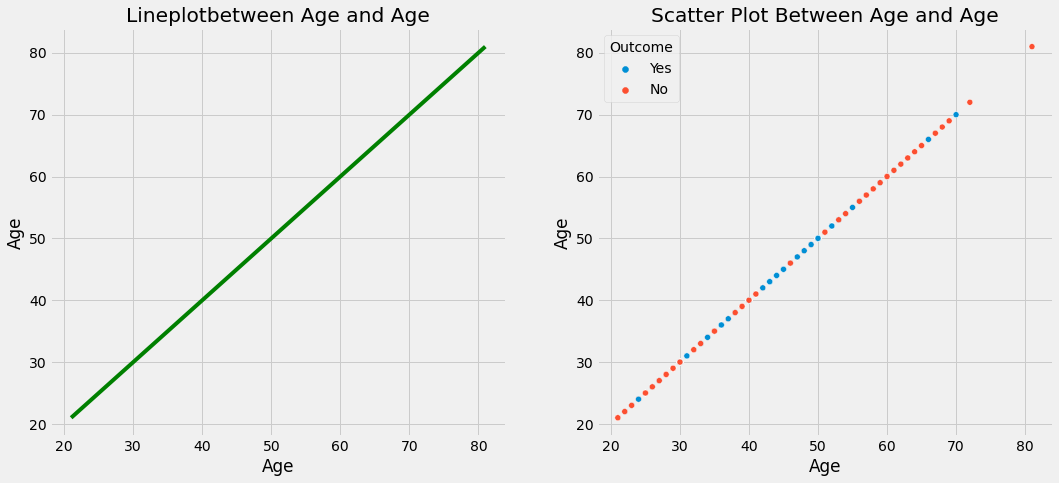

In [24]:
for col in data.select_dtypes(exclude="O").columns:
    lineplot_scatterplot(data=data, feature1="Age", feature2=col)
    
    

In [25]:
# create acorrelation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


In [27]:
df=data.copy()
d={"Yes":1, "No":0}
df["Outcome"]=df["Outcome"].map(d)

In [ ]:
data1[data1.columns[:]].corr()["Outcome"]

In [ ]:
sns.pairplot(data1, hue="Outcome", kind='reg')

<AxesSubplot:>

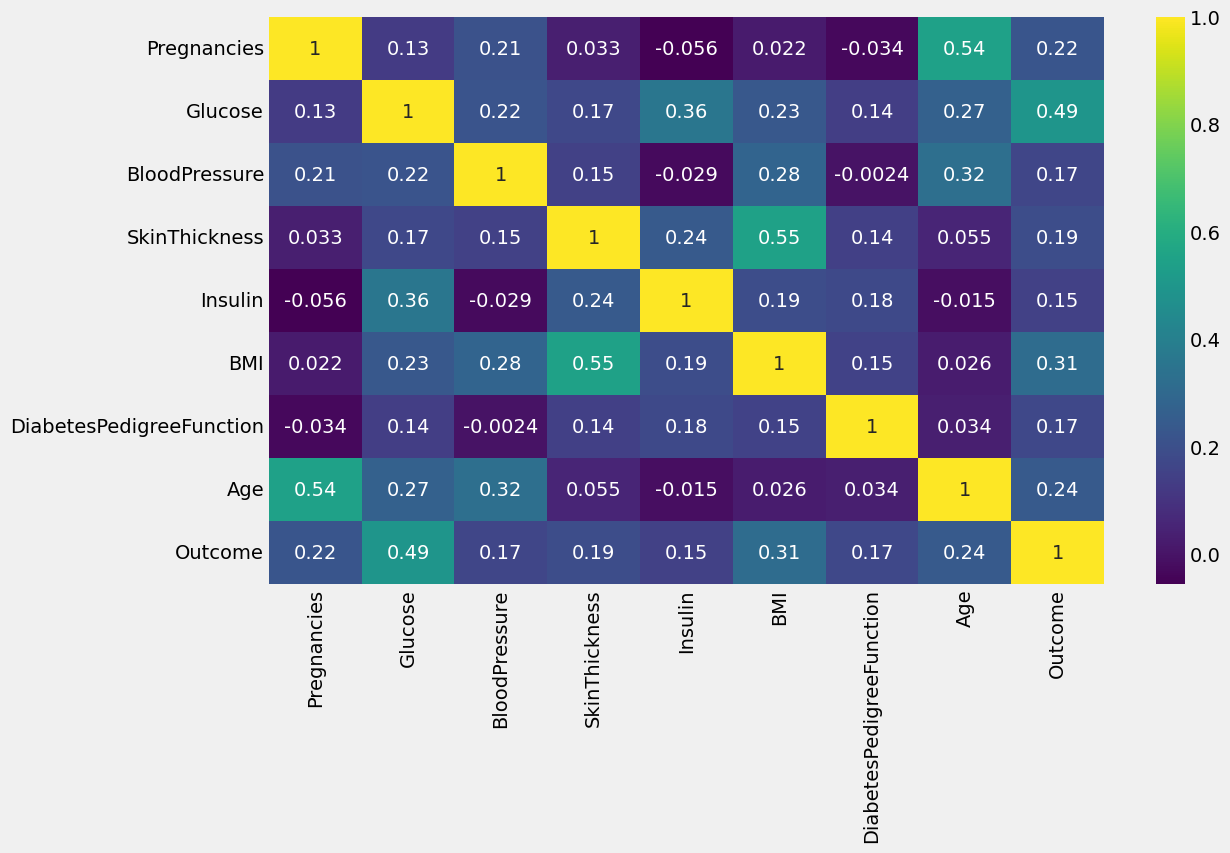

In [31]:
plt.figure(figsize=(12,7))
sns.heatmap(data1.corr(), annot=True, cmap="viridis")

# To be contd....

In [ ]:
### step 3 : Preprocessing

* seperate the features and label
# do the label encoding
# impute the missing values
# 

In [28]:
X = df.drop("Outcome", axis = 1)
y = df.Outcome

In [29]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X,y =sm.fit_resample(X,y)

In [32]:
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [39]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(700, 8) (700,) (300, 8) (300,)


In [ ]:
#Step 5 to  - Model Fitting, Evaluation, Optimization, Interpertation



In [42]:
#create a metric function
def print_mertrics(y_test, y_pred, model_name):
    print("metrics for model ...", model_name)
    print('')
    print("Accuracy score is {:.3f}".format(accuracy_score(y_test, y_pred)))
    print('')
    print("Recall score is {:.3f}".format(recall_score(y_test, y_pred)))
    print('')
    print("Precision score is {:.3f}".format(precision_score(y_test, y_pred)))
    print('')
    print("F1 score is {:.3f}".format(f1_score(y_test, y_pred)))
    print('')
    print("Roc Auc score is {:.3f}".format(roc_auc_score(y_test, y_pred)))
    print('Classification report')
    print(classification_report(y_test, y_pred))

In [49]:
def plot_metrics(clf, x_test, y_test):
    plot_confusion_matrix(clf, x_test, y_test, display_labels = [0,1])
    print('')
    plot_roc_curve(clf, x_test, y_test)
    print('')
    plot_precision_recall_curve(clf, x_test, y_test)
    plt.show()

In [53]:
#fit evaluate a knn model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print_metrics(y_test, y_pred, KNN)


NameError: name 'print_metrics' is not defined